In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
dataset = 'https://www.kaggle.com/datasets/darrylljk/singapore-hdb-resale-flat-prices-2017-2024'

In [4]:
od.download(dataset)

Skipping, found downloaded files in ".\singapore-hdb-resale-flat-prices-2017-2024" (use force=True to force download)


In [5]:
import os

In [6]:
data_dir = '.\singapore-hdb-resale-flat-prices-2017-2024'

In [7]:
os.listdir(data_dir)

['sg-resale-flat-prices-2017-onwards.csv']

In [8]:
import pandas as pd

In [9]:
hdb_df = pd.read_csv('sg-resale-flat-prices-2017-onwards.csv')
hdb_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
181257,2024-06,YISHUN,5 ROOM,502B,YISHUN ST 51,10 TO 12,112.0,Improved,2018,92 years 08 months,738000.0
181258,2024-06,YISHUN,5 ROOM,865,YISHUN ST 81,07 TO 09,122.0,Improved,1988,62 years 10 months,680000.0
181259,2024-06,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,61 years,790000.0
181260,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,62 years 08 months,1000000.0


In [10]:
# Finding out the content of the dataset 

hdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181262 entries, 0 to 181261
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                181262 non-null  object 
 1   town                 181262 non-null  object 
 2   flat_type            181262 non-null  object 
 3   block                181262 non-null  object 
 4   street_name          181262 non-null  object 
 5   storey_range         181262 non-null  object 
 6   floor_area_sqm       181262 non-null  float64
 7   flat_model           181262 non-null  object 
 8   lease_commence_date  181262 non-null  int64  
 9   remaining_lease      181262 non-null  object 
 10  resale_price         181262 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 15.2+ MB


In [11]:
pd.set_option('display.max_columns', None)

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

hdb_df = hdb_df.drop(hdb_df[['street_name', 'flat_model', 'block']], axis=1)

hdb_df


,month,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...
181257,2024-06,YISHUN,5 ROOM,10 TO 12,112.0,2018,92 years 08 months,738000.0
181258,2024-06,YISHUN,5 ROOM,07 TO 09,122.0,1988,62 years 10 months,680000.0
181259,2024-06,YISHUN,EXECUTIVE,10 TO 12,146.0,1986,61 years,790000.0
181260,2024-06,YISHUN,EXECUTIVE,10 TO 12,146.0,1988,62 years 08 months,1000000.0


<Axes: ylabel='floor_area_sqm'>

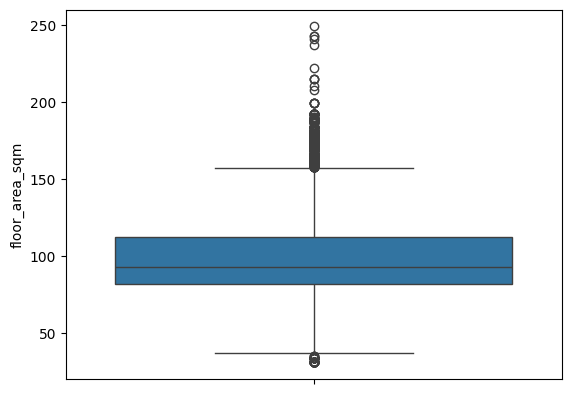

In [12]:
# Outlier analysis on 'floor_area_sqm'

sns.boxplot(y='floor_area_sqm', data=hdb_df)

In [13]:
hdb_df_above_186 = hdb_df[hdb_df['floor_area_sqm'] > 186]
hdb_df_above_186

,month,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
2187,2017-02,WOODLANDS,EXECUTIVE,10 TO 12,192.0,1994,75 years 11 months,760000.0
4060,2017-03,WOODLANDS,EXECUTIVE,07 TO 09,189.0,1994,76 years 01 month,800000.0
5890,2017-04,WOODLANDS,EXECUTIVE,07 TO 09,192.0,1994,75 years 09 months,729000.0
7854,2017-05,WOODLANDS,EXECUTIVE,10 TO 12,189.0,1994,75 years 08 months,765000.0
8868,2017-06,KALLANG/WHAMPOA,3 ROOM,01 TO 03,215.0,1972,54 years 01 month,830000.0
...,...,...,...,...,...,...,...,...
169006,2023-12,WOODLANDS,EXECUTIVE,04 TO 06,192.0,1994,69 years 02 months,1038000.0
171559,2024-01,WOODLANDS,EXECUTIVE,04 TO 06,192.0,1994,69 years 02 months,930000.0
172801,2024-02,KALLANG/WHAMPOA,3 ROOM,01 TO 03,208.0,1972,47 years 06 months,1280000.0
175798,2024-03,WOODLANDS,EXECUTIVE,04 TO 06,189.0,1994,69 years 03 months,980000.0


In [14]:
hdb_df_below_45 = hdb_df[hdb_df['floor_area_sqm'] < 45]
hdb_df_below_45

,month,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,1979,61 years 04 months,232000.0
195,2017-01,BUKIT MERAH,2 ROOM,07 TO 09,34.0,1971,53 years 06 months,218000.0
196,2017-01,BUKIT MERAH,2 ROOM,07 TO 09,34.0,1971,53 years 06 months,230000.0
383,2017-01,GEYLANG,2 ROOM,07 TO 09,42.0,1971,53 years,205000.0
384,2017-01,GEYLANG,2 ROOM,10 TO 12,42.0,1971,53 years,215000.0
...,...,...,...,...,...,...,...,...
180896,2024-06,BUKIT MERAH,2 ROOM,07 TO 09,43.0,1970,44 years 10 months,250000.0
181013,2024-06,JURONG WEST,2 ROOM,10 TO 12,38.0,2019,94 years,330000.0
181065,2024-06,PUNGGOL,2 ROOM,19 TO 21,38.0,2018,93 years 06 months,332000.0
181102,2024-06,SEMBAWANG,2 ROOM,07 TO 09,38.0,2019,94 years,327000.0


In [15]:
# removing outliers by dropping the impacted rows

hdb_df = hdb_df.drop(index=hdb_df_above_186.index)
hdb_df

,month,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...
181257,2024-06,YISHUN,5 ROOM,10 TO 12,112.0,2018,92 years 08 months,738000.0
181258,2024-06,YISHUN,5 ROOM,07 TO 09,122.0,1988,62 years 10 months,680000.0
181259,2024-06,YISHUN,EXECUTIVE,10 TO 12,146.0,1986,61 years,790000.0
181260,2024-06,YISHUN,EXECUTIVE,10 TO 12,146.0,1988,62 years 08 months,1000000.0


In [16]:
# removing outliers by dropping the impacted rows

hdb_df = hdb_df.drop(index=hdb_df_below_45.index)
hdb_df

,month,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
1,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,62 years 05 months,265000.0
5,2017-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,1981,63 years,275000.0
...,...,...,...,...,...,...,...,...
181257,2024-06,YISHUN,5 ROOM,10 TO 12,112.0,2018,92 years 08 months,738000.0
181258,2024-06,YISHUN,5 ROOM,07 TO 09,122.0,1988,62 years 10 months,680000.0
181259,2024-06,YISHUN,EXECUTIVE,10 TO 12,146.0,1986,61 years,790000.0
181260,2024-06,YISHUN,EXECUTIVE,10 TO 12,146.0,1988,62 years 08 months,1000000.0


<Axes: ylabel='resale_price'>

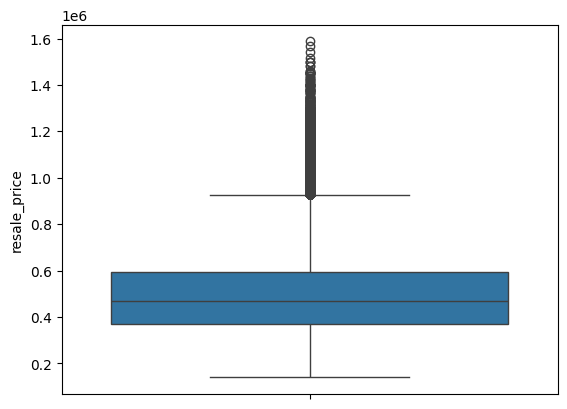

In [17]:
# Outlier analysis on 'resale_price'

sns.boxplot(y='resale_price', data=hdb_df)

In [18]:
# Calculate Q1 and Q3
q1 = hdb_df['resale_price'].quantile(0.25)
q3 = hdb_df['resale_price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Calculate the upper boundary for outliers
upper_boundary = q3 + 1.5 * iqr
upper_boundary

927500.0

In [19]:
hdb_df_above_up = hdb_df[hdb_df['resale_price'] > 927500]
hdb_df_above_up

,month,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
310,2017-01,CENTRAL AREA,5 ROOM,49 TO 51,105.0,2011,93 years,1108000.0
664,2017-01,KALLANG/WHAMPOA,5 ROOM,25 TO 27,119.0,2011,93 years,1005000.0
1329,2017-02,BISHAN,5 ROOM,40 TO 42,120.0,2011,93 years 07 months,1180000.0
1397,2017-02,BUKIT MERAH,5 ROOM,19 TO 21,115.0,2013,95 years 03 months,955000.0
1398,2017-02,BUKIT MERAH,5 ROOM,34 TO 36,114.0,2013,95 years 03 months,980000.0
...,...,...,...,...,...,...,...,...
181178,2024-06,TAMPINES,EXECUTIVE,01 TO 03,146.0,1989,64 years,960000.0
181195,2024-06,TOA PAYOH,4 ROOM,16 TO 18,93.0,2019,94 years 08 months,940000.0
181197,2024-06,TOA PAYOH,5 ROOM,13 TO 15,153.0,1984,59 years 02 months,1130000.0
181260,2024-06,YISHUN,EXECUTIVE,10 TO 12,146.0,1988,62 years 08 months,1000000.0


In [20]:
hdb_df['resale_price'].max()

1588000.0

In [21]:
# redefining 'remaining_lease' feature from years and months into months.
# creating a new feature column 'lease_remaining'

def convert_to_months(remaining_lease):
    parts = remaining_lease.split()
    years = 0
    months = 0

    for i in range(len(parts)):
        if 'year' in parts[i]:
            years = int(parts[i-1])
        elif 'month' in parts[i]:
            months = int(parts[i-1])
       
    total_months = years * 12 + months
    return total_months

hdb_df['lease_remaining'] = hdb_df['remaining_lease'].apply(convert_to_months)
  
hdb_df = hdb_df.drop('remaining_lease', axis=1)

hdb_df

,month,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,resale_price,lease_remaining
1,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1978,250000.0,727
2,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,262000.0,749
3,2017-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,1980,265000.0,745
4,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,265000.0,749
5,2017-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,1981,275000.0,756
...,...,...,...,...,...,...,...,...
181257,2024-06,YISHUN,5 ROOM,10 TO 12,112.0,2018,738000.0,1112
181258,2024-06,YISHUN,5 ROOM,07 TO 09,122.0,1988,680000.0,754
181259,2024-06,YISHUN,EXECUTIVE,10 TO 12,146.0,1986,790000.0,732
181260,2024-06,YISHUN,EXECUTIVE,10 TO 12,146.0,1988,1000000.0,752


In [22]:
# check if any of lease remaining is above 1188 months ie greater than 99 years

hdb_df_above_1188 = hdb_df[hdb_df['lease_remaining'] > 1188]
display(len(hdb_df_above_1188))

0

In [23]:
display(hdb_df)

,month,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,resale_price,lease_remaining
1,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1978,250000.0,727
2,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,262000.0,749
3,2017-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,1980,265000.0,745
4,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,265000.0,749
5,2017-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,1981,275000.0,756
...,...,...,...,...,...,...,...,...
181257,2024-06,YISHUN,5 ROOM,10 TO 12,112.0,2018,738000.0,1112
181258,2024-06,YISHUN,5 ROOM,07 TO 09,122.0,1988,680000.0,754
181259,2024-06,YISHUN,EXECUTIVE,10 TO 12,146.0,1986,790000.0,732
181260,2024-06,YISHUN,EXECUTIVE,10 TO 12,146.0,1988,1000000.0,752


In [24]:
# dropping the 'month' and 'lease_commence_date' from dataset

hdb_df = hdb_df.drop(['month', 'lease_commence_date'], axis=1)
hdb_df

,town,flat_type,storey_range,floor_area_sqm,resale_price,lease_remaining
1,ANG MO KIO,3 ROOM,01 TO 03,67.0,250000.0,727
2,ANG MO KIO,3 ROOM,01 TO 03,67.0,262000.0,749
3,ANG MO KIO,3 ROOM,04 TO 06,68.0,265000.0,745
4,ANG MO KIO,3 ROOM,01 TO 03,67.0,265000.0,749
5,ANG MO KIO,3 ROOM,01 TO 03,68.0,275000.0,756
...,...,...,...,...,...,...
181257,YISHUN,5 ROOM,10 TO 12,112.0,738000.0,1112
181258,YISHUN,5 ROOM,07 TO 09,122.0,680000.0,754
181259,YISHUN,EXECUTIVE,10 TO 12,146.0,790000.0,732
181260,YISHUN,EXECUTIVE,10 TO 12,146.0,1000000.0,752


In [25]:
hdb_df.describe()

,floor_area_sqm,resale_price,lease_remaining
count,180286.000000,1.802860e+05,180286.000000
mean,97.344420,4.987337e+05,895.699084
std,23.628913,1.718718e+05,167.015426
min,45.000000,1.400000e+05,498.000000
25%,82.000000,3.700000e+05,759.000000
50%,93.000000,4.688880e+05,894.000000
75%,112.000000,5.930000e+05,1060.000000
max,186.000000,1.588000e+06,1173.000000


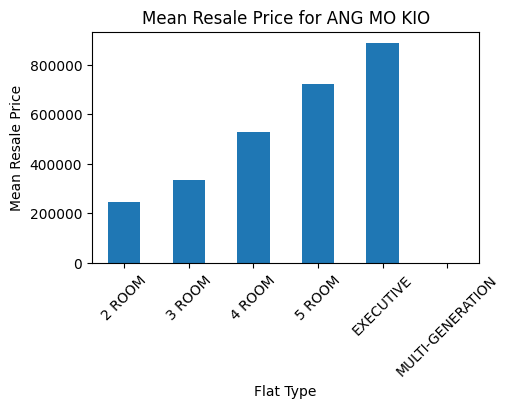

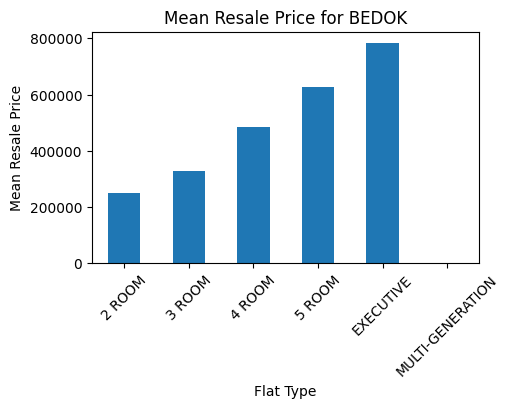

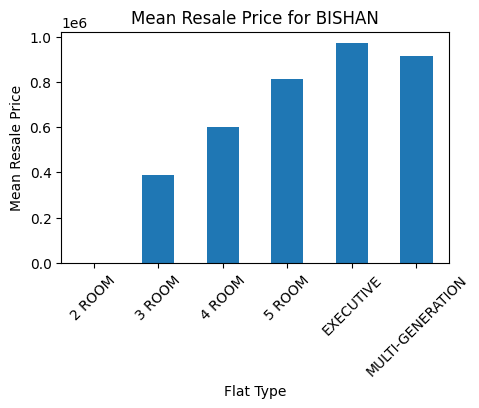

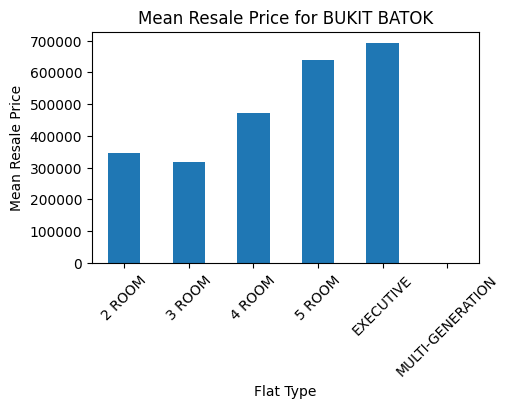

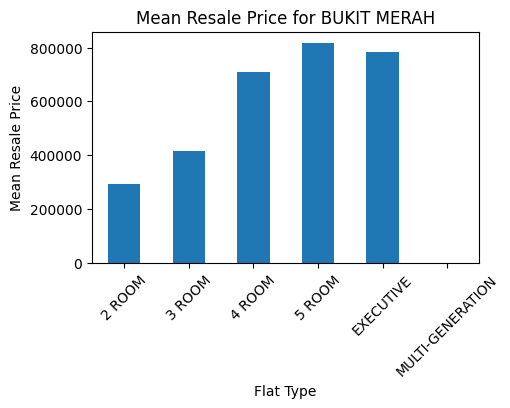

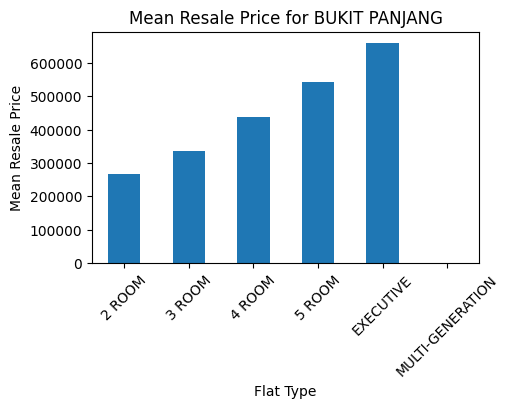

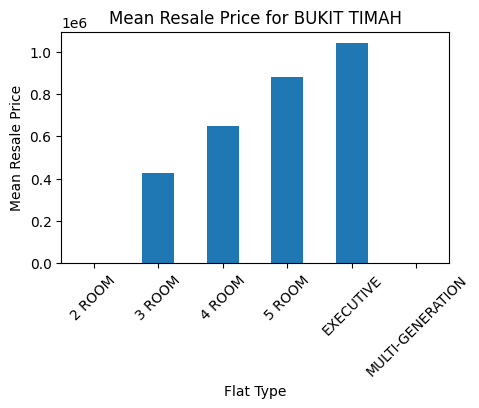

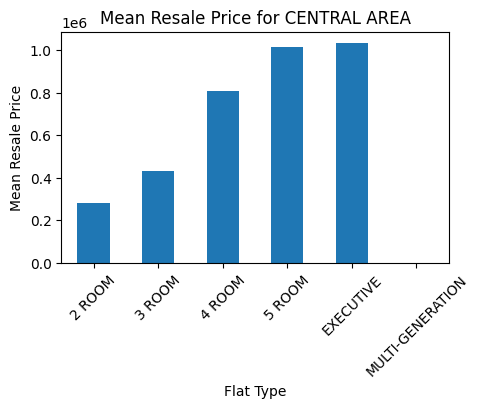

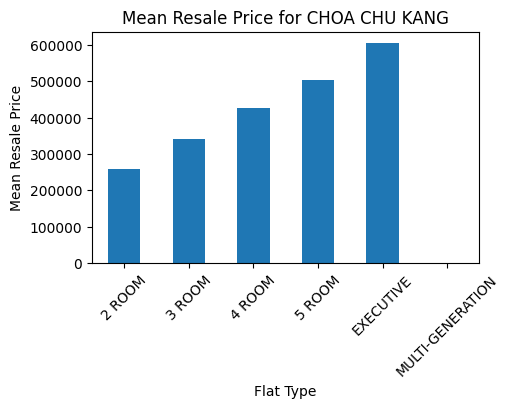

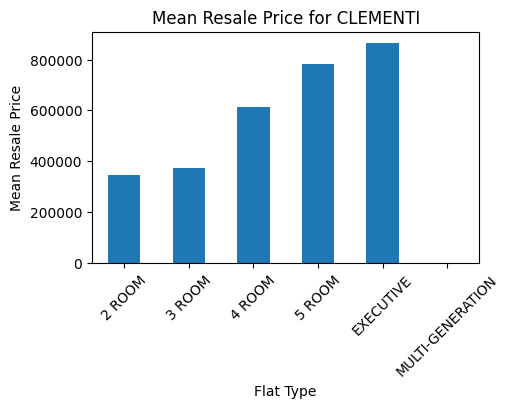

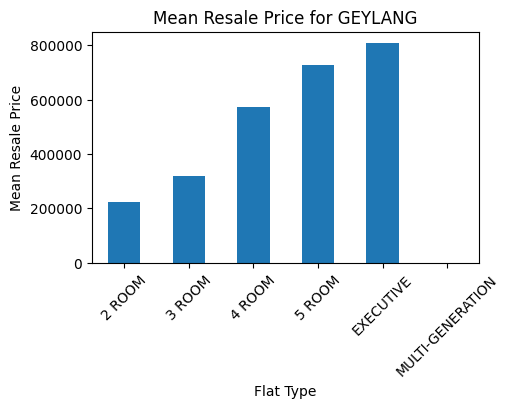

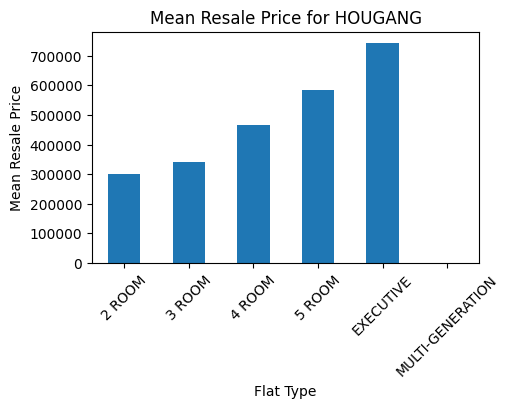

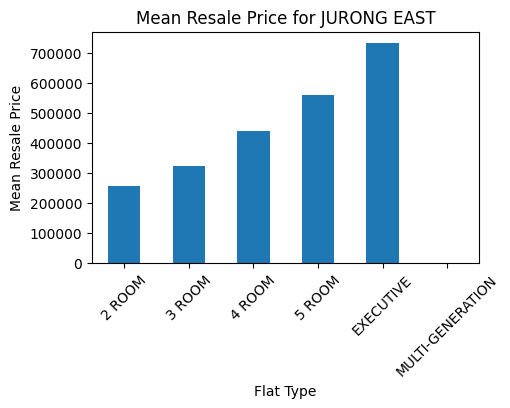

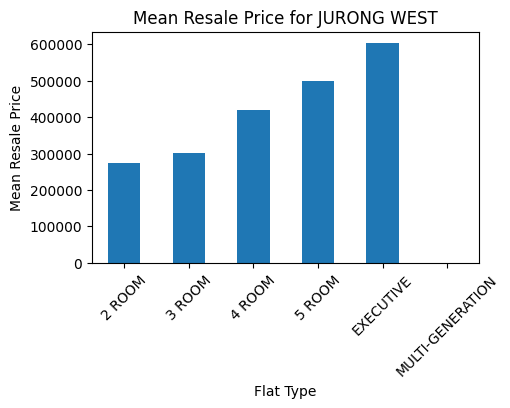

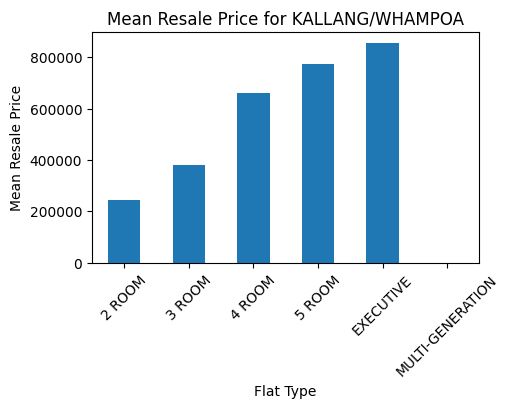

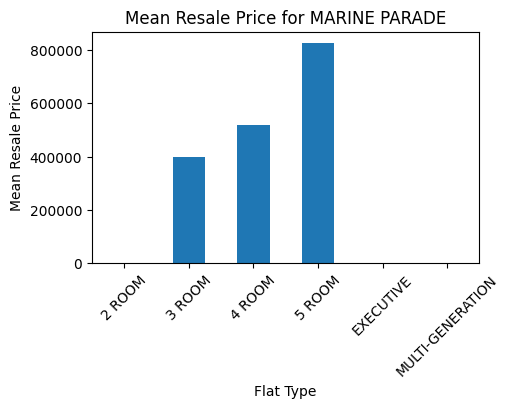

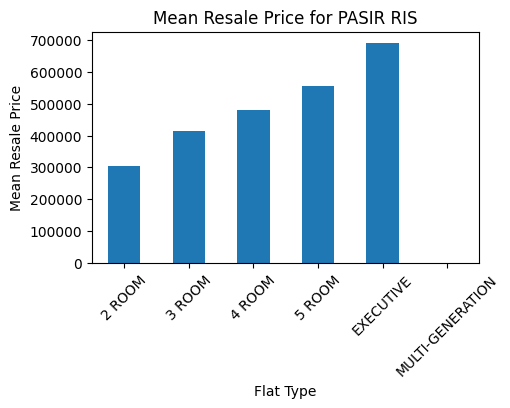

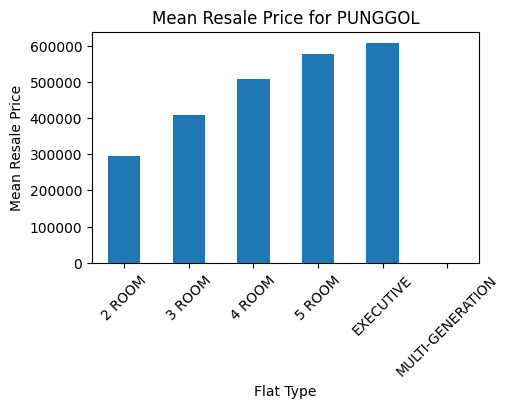

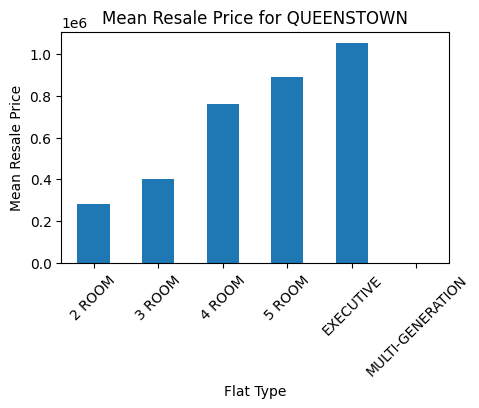

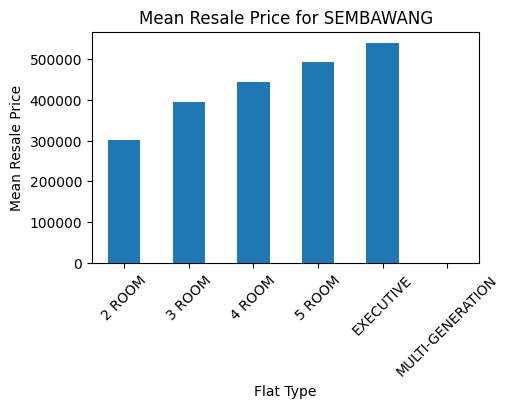

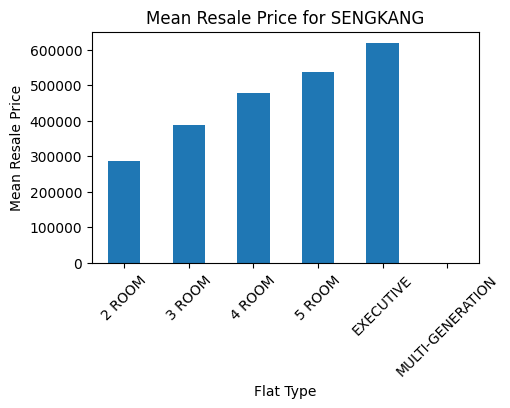

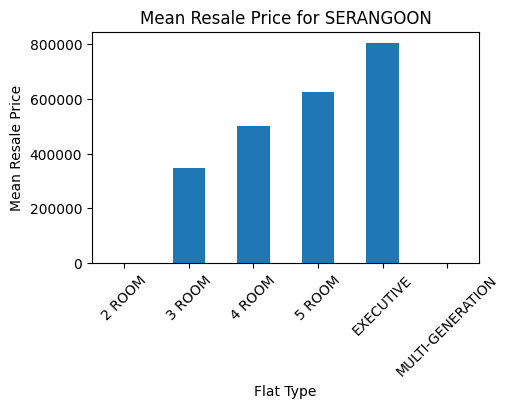

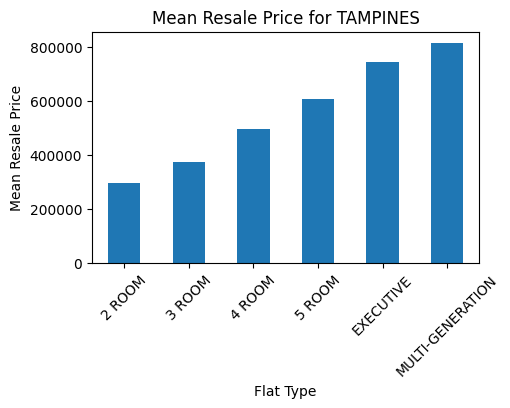

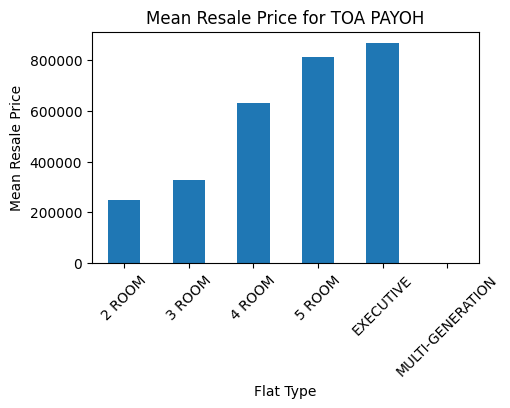

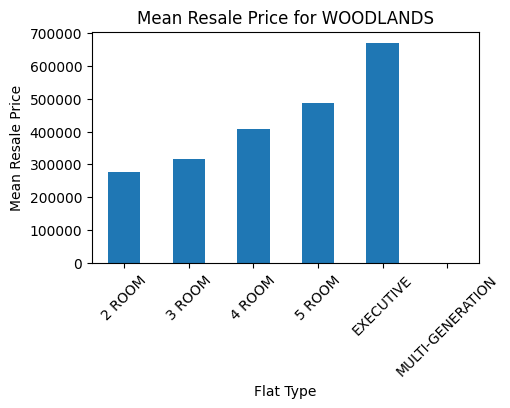

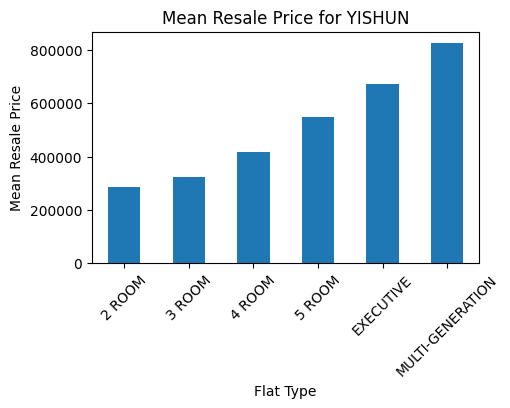

In [26]:
# barchart comparing mean prices of 'flat_type' by 'town'

mean_resale_price = hdb_df.groupby(['town', 'flat_type'])['resale_price'].mean().unstack()

towns = mean_resale_price.index

for town in towns:
    plt.figure(figsize=(5, 3))
    mean_resale_price.loc[town].plot(kind='bar')
    plt.title(f'Mean Resale Price for {town}')
    plt.xlabel('Flat Type')
    plt.ylabel('Mean Resale Price')
    plt.xticks(rotation=45)
    plt.show()



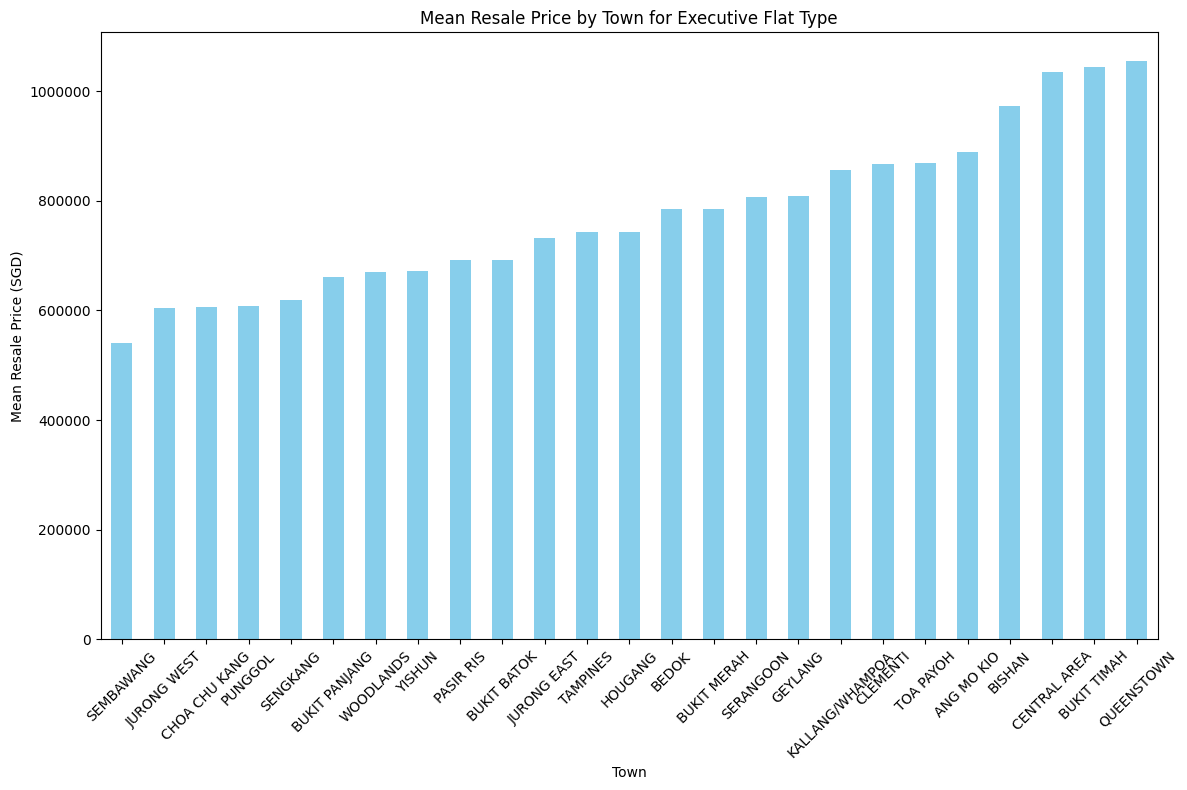

In [27]:


# Filter for 'executive' flat type
executive_flats = hdb_df[hdb_df['flat_type'] == 'EXECUTIVE']

# Group by town and calculate the mean resale price
mean_prices = executive_flats.groupby('town')['resale_price'].mean().sort_values()

# Plotting
plt.figure(figsize=(12, 8))
mean_prices.plot(kind='bar', color='SkyBlue')
plt.title('Mean Resale Price by Town for Executive Flat Type')
plt.xlabel('Town')

plt.ylabel('Mean Resale Price (SGD)')
plt.xticks(rotation=45)


# Remove scientific notation from the y-axis
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


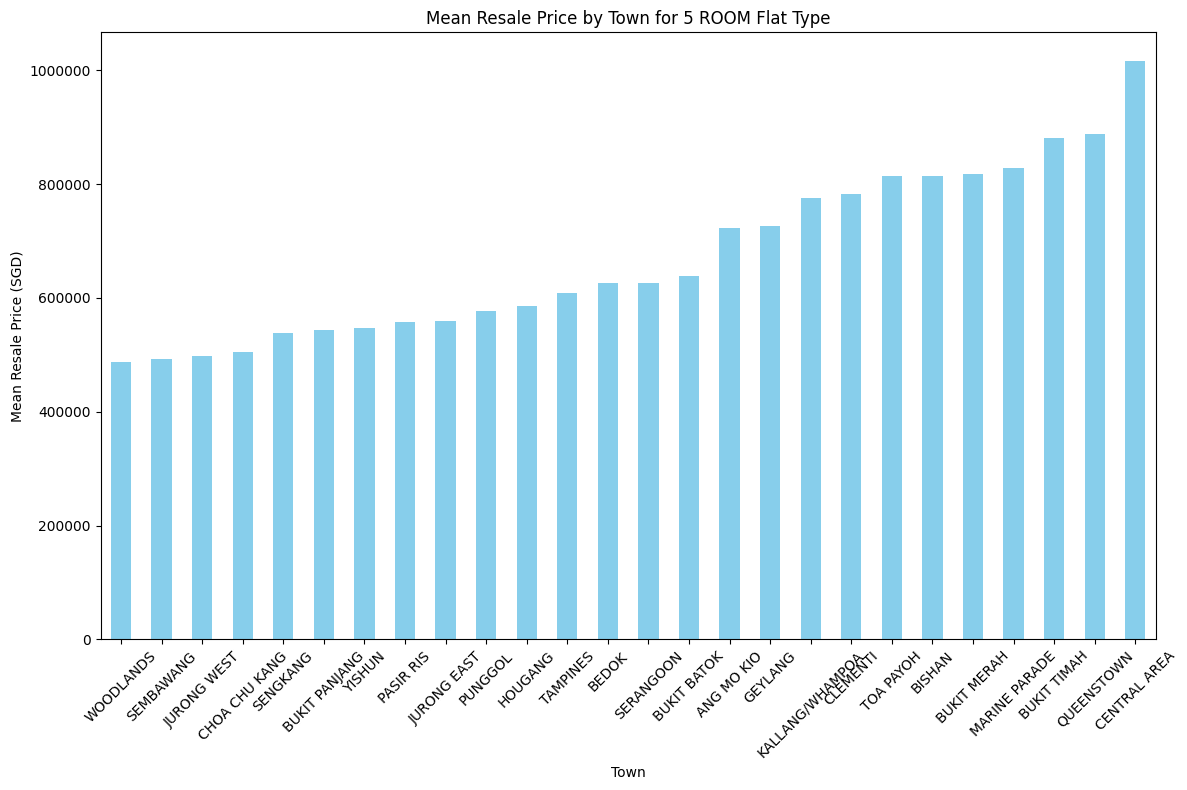

In [28]:


# Filter for 'executive' flat type
five_room_flats = hdb_df[hdb_df['flat_type'] == '5 ROOM']

# Group by town and calculate the mean resale price
mean_prices = five_room_flats.groupby('town')['resale_price'].mean().sort_values()


# Plotting
plt.figure(figsize=(12, 8))
mean_prices.plot(kind='bar', color='skyblue')
plt.title('Mean Resale Price by Town for 5 ROOM Flat Type')
plt.xlabel('Town')

plt.ylabel('Mean Resale Price (SGD)')
plt.xticks(rotation=45)

# Remove scientific notation from the y-axis
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


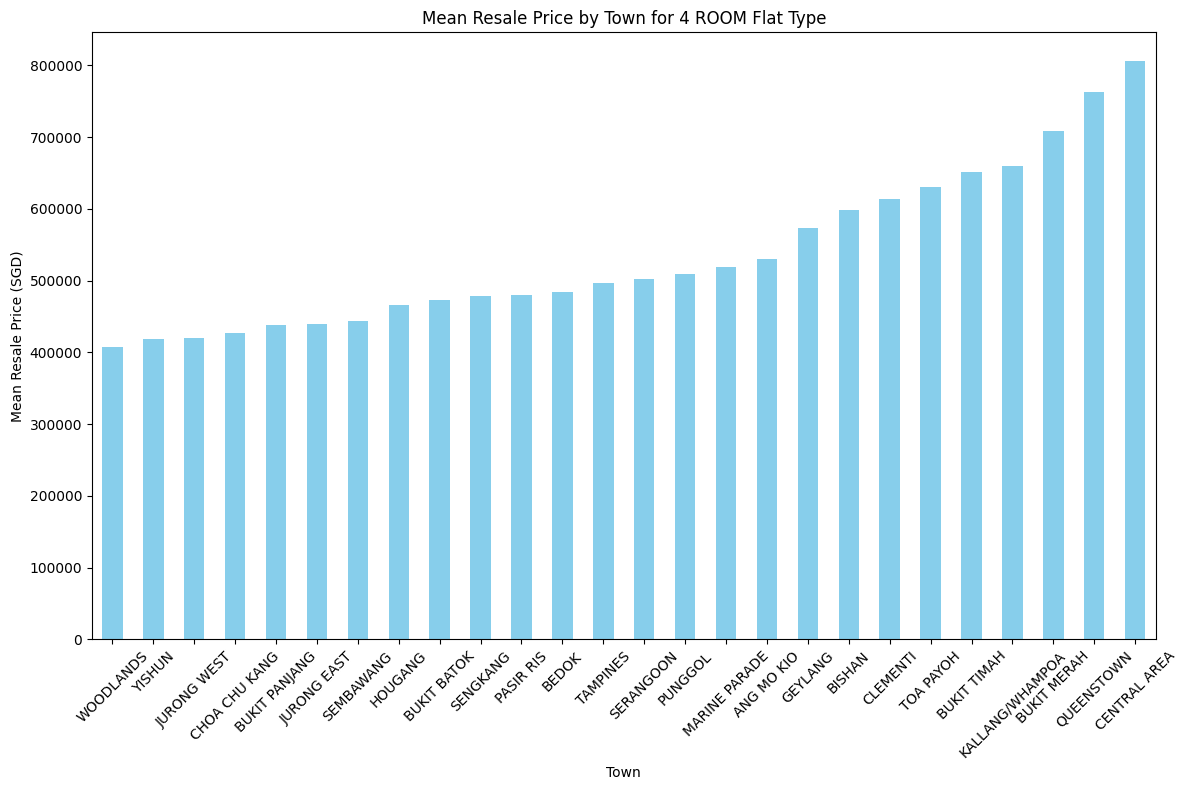

In [29]:

# Filter for 'executive' flat type
four_room_flats = hdb_df[hdb_df['flat_type'] == '4 ROOM']

# Group by town and calculate the mean resale price
mean_prices = four_room_flats.groupby('town')['resale_price'].mean().sort_values()


# Plotting
plt.figure(figsize=(12, 8))
mean_prices.plot(kind='bar', color='skyblue')
plt.title('Mean Resale Price by Town for 4 ROOM Flat Type')
plt.xlabel('Town')

plt.ylabel('Mean Resale Price (SGD)')
plt.xticks(rotation=45)

# Remove scientific notation from the y-axis
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


First outlier for resale_price: [508000.0, 580000.0, 808000.0, 1108000.0, 1160000.0, 1200000.0]


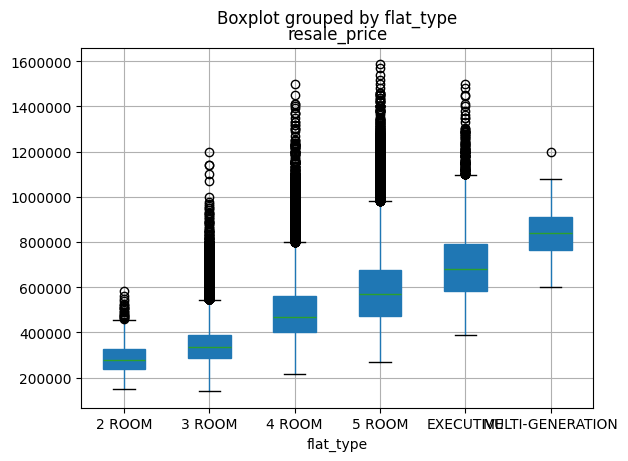

In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# ploting the boxplot
boxplot_dict = hdb_df.boxplot(column='resale_price', by='flat_type', patch_artist=True, return_type='dict')

# Extract the first outlier for each flat type
outliers = {}
for flat_type, data in boxplot_dict.items():
    outliers[flat_type] = [flier.get_ydata()[0] for flier in data['fliers'] if len(flier.get_ydata()) > 0]

# Print the first outlier for each flat type
for flat_type, outlier_value in outliers.items():
    print(f"First outlier for {flat_type}: {outlier_value}")

# Remove scientific notation on the y-axis
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.gca().ticklabel_format(style='plain', axis='y')

plt.show()



In [31]:
# Define a function to calculate the upper boundary
def calculate_upper_boundary(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                   # Interquartile Range
    upper_boundary = Q3 + 1.5 * IQR  # Upper boundary
    return upper_boundary

# List of flat types to calculate upper boundaries for
flat_types = hdb_df['flat_type'].unique()

# Create a copy of the original dataset to store the filtered data
filtered_hdb_df = pd.DataFrame()

# Loop through each flat type to remove outliers
for flat_type in flat_types:
    # Filter the DataFrame by flat type
    flat_data = hdb_df[hdb_df['flat_type'] == flat_type]
    
    # Calculate the upper boundary for resale_price
    upper_boundary = calculate_upper_boundary(flat_data, 'resale_price')

    # Print the upper boundary for the current flat type
    print(f"Upper boundary for {flat_type}: {upper_boundary:.2f}")
    
    # Filter out outliers above the upper boundary
    filtered_data = flat_data[flat_data['resale_price'] <= upper_boundary]
    
    # Append the filtered data (without outliers) to the new DataFrame
    filtered_hdb_df = pd.concat([filtered_hdb_df, filtered_data])

# Check the filtered dataset (without outliers)
filtered_hdb_df


Upper boundary for 3 ROOM: 546168.00
Upper boundary for 4 ROOM: 800000.00
Upper boundary for 5 ROOM: 980000.00
Upper boundary for EXECUTIVE: 1097500.00
Upper boundary for 2 ROOM: 455500.00
Upper boundary for MULTI-GENERATION: 1124000.00


,town,flat_type,storey_range,floor_area_sqm,resale_price,lease_remaining
1,ANG MO KIO,3 ROOM,01 TO 03,67.0,250000.0,727
2,ANG MO KIO,3 ROOM,01 TO 03,67.0,262000.0,749
3,ANG MO KIO,3 ROOM,04 TO 06,68.0,265000.0,745
4,ANG MO KIO,3 ROOM,01 TO 03,67.0,265000.0,749
5,ANG MO KIO,3 ROOM,01 TO 03,68.0,275000.0,756
...,...,...,...,...,...,...
156335,YISHUN,MULTI-GENERATION,04 TO 06,159.0,935000.0,762
169151,YISHUN,MULTI-GENERATION,01 TO 03,179.0,975000.0,757
171961,BISHAN,MULTI-GENERATION,07 TO 09,134.0,980000.0,749
173897,YISHUN,MULTI-GENERATION,04 TO 06,164.0,998000.0,755


First outlier for resale_price: [140000.0, 790000.0, 980000.0, 1088000.0]


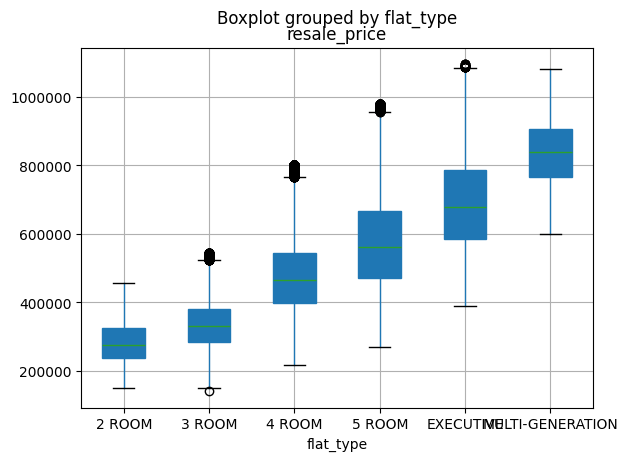

In [32]:
# import matplotlib.ticker as mticker

# ploting the boxplot
boxplot_dict = filtered_hdb_df.boxplot(column='resale_price', by='flat_type', patch_artist=True, return_type='dict')

# Extract the first outlier for each flat type
outliers = {}
for flat_type, data in boxplot_dict.items():
    outliers[flat_type] = [flier.get_ydata()[0] for flier in data['fliers'] if len(flier.get_ydata()) > 0]

# Print the first outlier for each flat type
for flat_type, outlier_value in outliers.items():
    print(f"First outlier for {flat_type}: {outlier_value}")

# Remove scientific notation on the y-axis
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.gca().ticklabel_format(style='plain', axis='y')

plt.show()



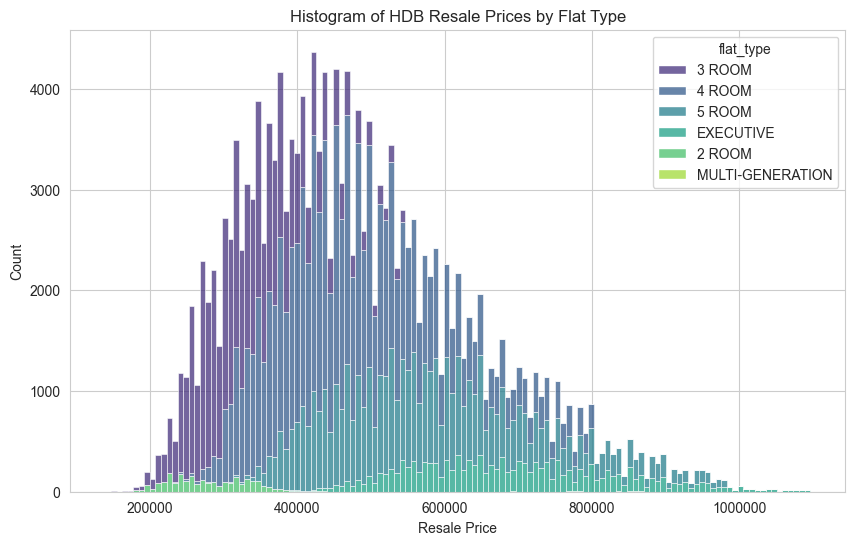

In [33]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_hdb_df, x='resale_price', hue='flat_type', multiple='stack', palette='viridis')

# Remove scientific notation from the x-axis
plt.ticklabel_format(style='plain', axis='x')

# Add titles and labels
plt.title('Histogram of HDB Resale Prices by Flat Type')
plt.xlabel('Resale Price')
plt.ylabel('Count')

# Show the plot
plt.show()

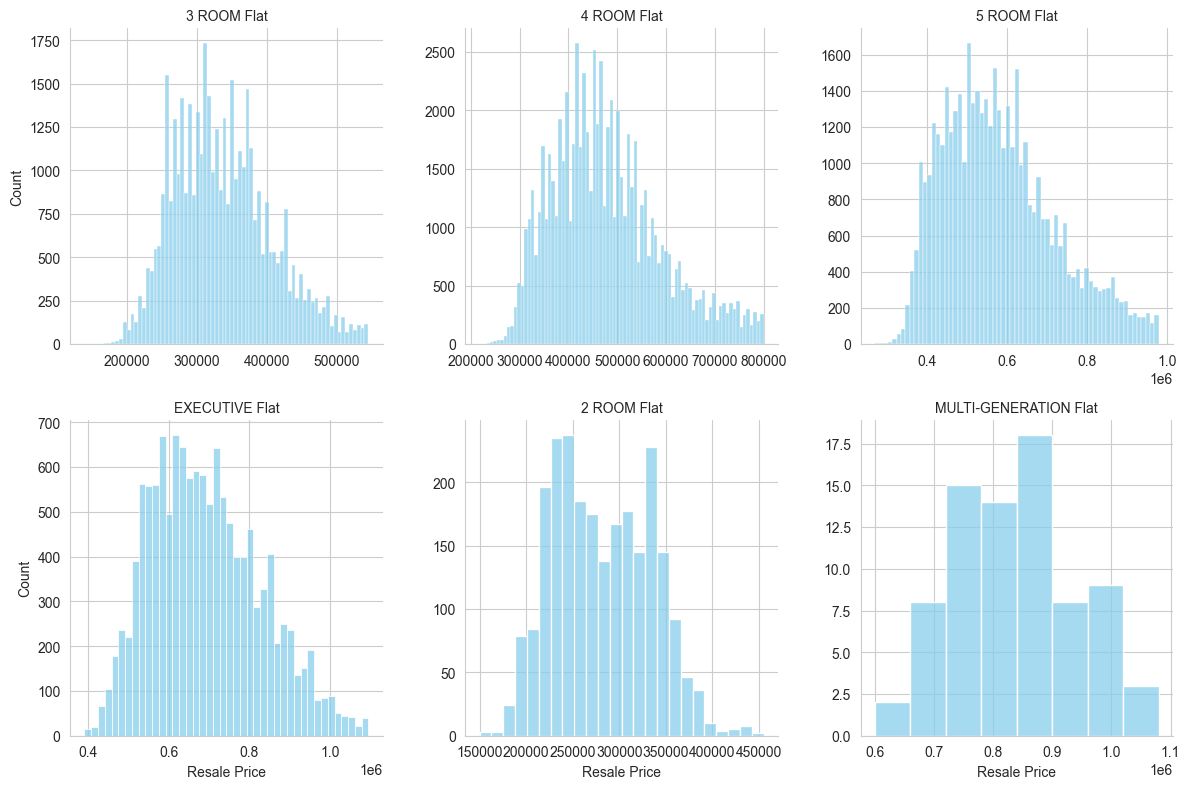

In [34]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a FacetGrid
g = sns.FacetGrid(filtered_hdb_df, col='flat_type', col_wrap=3, height=4, sharex=False, sharey=False)

# Map the histogram to the grid
g.map(sns.histplot, 'resale_price', kde=False, color='skyblue')

# Add titles and labels
g.set_titles("{col_name} Flat")
g.set_axis_labels('Resale Price', 'Count')

# Remove scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()